In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from decimal import Decimal
import matplotlib
from matplotlib.ticker import MultipleLocator
import scipy
matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11) 

# Loading and processing datasets

In [2]:
test_sizes = [24,30,36,42,48,54,60]
non_locality = [1,2,3,4]
all_data = {}
z2 = len(non_locality)
z = len(test_sizes)
ehxcmae = np.zeros((z2,z))
vhxcmae_c = np.zeros((z2,z))

emae = np.zeros((z2,z))
ehxcksmae = np.zeros((z2,z))
vhxcksmae_c = np.zeros((z2,z))
dmae_c = np.zeros((z2,z))

vhxcmae = np.zeros((3,60))
dmae = np.zeros((3,60))
vhxcksmae = np.zeros((3,60))

In [3]:
for j, L in enumerate(test_sizes):
    with open('data_json/exact_data/L'+str(L)+'_num1000.json', 'r') as f:
        data = json.load(f)
    data = {'L':data['L'],
         'num':data['num'],
         'n_up':np.array(data['n_up']),
         'n_dn':np.array(data['n_dn']),
         'e_mb':np.array(data['e_mb']),
         'v':np.array(data['v']),
         'e_hxc':np.array(data['e_hxc']),
         'v_hxc':np.array(data['v_hxc']),
         'norm_tol':np.array(data['norm_tol']),
         'reverse_engineering_error':np.array(data['reverse_engineering_error'])}
    all_data['exact_L'+str(L)] = data
    for i, a in enumerate(non_locality):
        with open('data_json/test_b_data/L'+str(L)+'_num1000_ks_a'+str(a)+'.json', 'rb') as f:
                data = json.load(f)
        data = {'v_hxc': np.array(data['v_hxc']),
        'e_hxc': np.array(data['e_hxc']),
        'e_ks': np.array(data['e_ks']),
        'eta': np.array(data['eta']),
        'n': np.array(data['n']),
        'num_its': np.array(data['num_its']),
        'v': np.array(data['v']),
        }
        all_data['ks_L'+str(L)+'_a'+str(a)] = data
        with open('data_json/test_a_data/L'+str(L)+'_num1000_a'+str(a)+'.json', 'rb') as f:
                data = json.load(f)
        data = {'v_hxc': np.array(data['v_hxc']),
                'e_hxc': np.array(data['e_hxc'])}
        all_data['ml_L'+str(L)+'_a'+str(a)] = data
        ehxcmae[i,j] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['e_hxc'] - all_data['exact_L'+str(L)]['e_hxc']))/L
        emae[i,j] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['e_ks'] - all_data['exact_L'+str(L)]['e_mb']))/L
        ehxcksmae[i,j] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['e_hxc'] - all_data['exact_L'+str(L)]['e_hxc']))/L
        vhxcksmae_c[i,j] = (np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2 -1]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2 -1])) + np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2])))/2
        dmae_c[i,j] = (np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n'][:,L//2 -1]-(all_data['exact_L'+str(L)]['n_up'][:,L//2 -1]+all_data['exact_L'+str(L)]['n_dn'][:,L//2 -1]))) + np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n'][:,L//2]-(all_data['exact_L'+str(L)]['n_up'][:,L//2]+all_data['exact_L'+str(L)]['n_dn'][:,L//2 ]))))/2
        vhxcmae_c[i,j] = (np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2 -1]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2 -1])) + np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc'][:,L//2]-all_data['exact_L'+str(L)]['v_hxc'][:,L//2])))/2
        if a ==4:
            if L == 36:
                vhxcmae[0, 12:48] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis = 0)
                dmae[0, 12:48] = np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n']-(all_data['exact_L'+str(L)]['n_up']+all_data['exact_L'+str(L)]['n_dn'])),axis=0)
                vhxcksmae[0, 12:48] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis=0)
            elif L == 48:
                vhxcmae[1, 6:54] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis = 0)
                dmae[1, 6:54] = np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n']-(all_data['exact_L'+str(L)]['n_up']+all_data['exact_L'+str(L)]['n_dn'])),axis=0)
                vhxcksmae[1, 6:54] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis=0)
            elif L == 60:
                vhxcmae[2] = np.mean(np.abs(all_data['ml_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis = 0)
                dmae[2] = np.mean(np.abs(2*all_data['ks_L'+str(L)+'_a'+str(a)]['n']-(all_data['exact_L'+str(L)]['n_up']+all_data['exact_L'+str(L)]['n_dn'])),axis=0)
                vhxcksmae[2] = np.mean(np.abs(all_data['ks_L'+str(L)+'_a'+str(a)]['v_hxc']-all_data['exact_L'+str(L)]['v_hxc']), axis=0)

In [4]:
with open('data_json/fig3_balda.json', mode = 'r') as f2:
    balda_data=json.load(f2)
balda_data['e_hxc_balda'] = np.array(balda_data['e_hxc_balda'])
balda_data['e_hxc_balda_ks'] = np.array(balda_data['e_hxc_balda_ks'])
balda_data['e_balda_ks'] = np.array(balda_data['e_balda_ks'])
balda_data['v_hxc_balda'] = np.array(balda_data['v_hxc_balda'])
balda_data['v_hxc_balda_ks'] = np.array(balda_data['v_hxc_balda_ks'])
balda_data['n_balda_ks'] = np.array(balda_data['n_balda_ks'])

# Parity plots from Section III.A

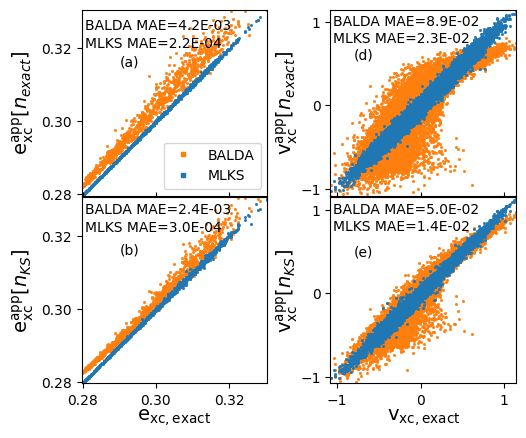

In [5]:

def fig_3_a_b_d_e(v_hxc_exact,v_hxc_ml,v_hxc_ml_ks,e_hxc_exact,e_hxc_ml,e_hxc_ml_ks, e_hxc_balda, v_hxc_balda,
            v_hxc_balda_ks,e_hxc_balda_ks, figsize):
    ps = 2.5
    fs = 10
    fs2 = 14
    vmlr = v_hxc_ml-v_hxc_exact
    vksr = v_hxc_ml_ks - v_hxc_exact
    excr = e_hxc_ml-e_hxc_exact
    excksr = e_hxc_ml_ks - e_hxc_exact
    excbr = e_hxc_balda - e_hxc_exact
    vxcbr = v_hxc_balda - v_hxc_exact
    vxcb_ksr = v_hxc_balda_ks - v_hxc_exact
    e_xc_b_ksr = e_hxc_balda_ks - e_hxc_exact
    e_xc_b_ksr_mae = '%.1E' % Decimal(str(np.mean(np.abs(e_xc_b_ksr))))
    vxcb_ksr_mae = '%.1E' % Decimal(str(np.mean(np.abs(vxcb_ksr))))
    vxcbr_mae = '%.1E' % Decimal(str(np.mean(np.abs(vxcbr))))
    excbr_mae = '%.1E' % Decimal(str(np.mean(np.abs(excbr))))
    excr_mae = '%.1E' % Decimal(str(np.mean(np.abs(excr))))
    excksr_mae = '%.1E' % Decimal(str(np.mean(np.abs(excksr))))
    vmlr_mae = '%.1E' % Decimal(str(np.mean(np.abs(vmlr))))
    vksr_mae = '%.1E' % Decimal(str(np.mean(np.abs(vksr))))
    f, ((a0,a1),(a2,a3)) = plt.subplots(2,2, gridspec_kw ={'height_ratios': [1,1], 'width_ratios':[1,1]}, sharex = False, sharey =False, figsize = (4.5*figsize, 3.5*figsize))
    f.subplots_adjust(left=0.078, bottom=0.1, right=1.0, top=0.99, hspace=0.01, wspace=0.0)
    a0.plot(e_hxc_exact, e_hxc_balda, 's', markersize = 1, c = 'C1',label = 'BALDA')
    a0.plot(e_hxc_exact,e_hxc_ml,'s', markersize = 1, c='C0', label = 'MLKS')
    a0.text(np.min(e_hxc_exact) + 0.001 ,0.325, 'BALDA MAE='+excbr_mae, fontsize = fs)
    a0.text(np.min(e_hxc_exact) + 0.001,0.32, 'MLKS MAE='+excr_mae, fontsize = fs)
    a0.text(0.29, 0.315, '(a)', fontsize = fs)
    a0.legend(markerscale = 3)
    #a0.grid()
    a0.set_aspect('equal', adjustable='box');a1.set_aspect('equal', adjustable='box');a2.set_aspect('equal', adjustable='box');a3.set_aspect('equal', adjustable='box')
    a0.set_ylabel(r'$\mathrm{e^{app}_{xc}}[n_{exact}]$', fontsize = fs2)
    a0.set_xticks(np.array([0.28,0.3,0.32]), fontsize=fs)
    a0.set_yticks(np.array([0.28,0.3,0.32]), fontsize=fs)
    #a0.xaxis.set_label_position('top') system
    a0.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a0.set_ylim(np.min(e_hxc_exact), np.max(e_hxc_exact))
    a0.set_xlim(np.min(e_hxc_exact), np.max(e_hxc_exact))
    a2.set_xlim(np.min(e_hxc_exact), np.max(e_hxc_exact))
    a2.set_ylim(np.min(e_hxc_exact), np.max(e_hxc_exact))
    a1.set_ylim(np.min(v_hxc_exact), np.max(v_hxc_exact))
    a3.set_ylim(np.min(v_hxc_exact), np.max(v_hxc_exact))
    a1.set_xlim(np.min(v_hxc_exact), np.max(v_hxc_exact))
    a3.set_xlim(np.min(v_hxc_exact), np.max(v_hxc_exact))
    a1.plot(v_hxc_exact,v_hxc_balda,'s',c='C1',markersize=1)
    a1.plot(v_hxc_exact,v_hxc_ml,'s',c='C0', markersize = 1)
    a1.text(np.min(v_hxc_exact) +0.03,0.95, 'BALDA MAE='+vxcbr_mae, fontsize = fs)
    a1.text(np.min(v_hxc_exact)+0.03,0.75, 'MLKS MAE='+vmlr_mae, fontsize = fs)
    a1.text(-0.8,0.55, '(d)', fontsize = fs)
    #a1.grid() 
    a1.set_ylabel(r'$\mathrm{v_{xc}^{app}}[n_{exact}]$', fontsize = fs2, labelpad=0.0) 
    a1.set_yticks(np.array([-1,0,1]), fontsize=fs)
    #a1.set_ylabel(r'$\mathrm{E^{ML}_{Hxc}}$', fontsize = fs)
    a1.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, labelbottom = False, top = False, labeltop = False)
    a2.plot(e_hxc_exact, e_hxc_balda_ks,'s',c='C1', markersize = 1)
    a2.plot(e_hxc_exact, e_hxc_ml_ks,'s', c='C0', markersize = 1)
    a2.set_xlabel(r'$\mathrm{e_{xc,exact}}$', fontsize = fs2, labelpad = 0) 
    a2.text(np.min(e_hxc_exact)+0.001,0.326, 'BALDA MAE='+e_xc_b_ksr_mae, fontsize = fs)
    a2.text(np.min(e_hxc_exact)+0.001,0.321, 'MLKS MAE='+excksr_mae, fontsize = fs)
    a2.text(0.29, 0.315, '(b)', fontsize = fs)
    a2.set_ylabel(r'$\mathrm{e_{xc}^{app}}[n_{KS}]$', fontsize = fs2)
    a2.set_xticks(np.array([0.28,0.3,0.32]), fontsize = fs)
    a2.set_yticks(np.array([0.28,0.3,0.32]), fontsize = fs)
    #a2.grid()
    a2.tick_params(axis = 'both', labelsize = fs, top = True, labeltop=False, bottom = True, labelbottom=True, left = True, labelleft = True)
    a3.plot(v_hxc_exact, v_hxc_balda_ks, 's', c='C1', markersize = 1)
    a3.plot(v_hxc_exact, v_hxc_ml_ks,'s', c='C0', markersize = 1)
    a3.text(np.min(v_hxc_exact)+0.03,0.75, 'MLKS MAE='+vksr_mae, fontsize = fs)
    a3.text(np.min(v_hxc_exact)+0.03,0.95, 'BALDA MAE='+vxcb_ksr_mae, fontsize = fs)
    a3.text(-0.8,0.45, '(e)', fontsize = fs)
    a3.set_ylabel(r'$\mathrm{v_{xc}^{app}}[n_{KS}]$', fontsize = fs2, labelpad = 0) 
    a3.set_xlabel(r'$\mathrm{v_{xc,exact}}$', fontsize = fs2, labelpad = 0)
    a3.set_xticks(np.array([-1,0,1]))
    a3.set_yticks(np.array([-1,0,1]))
    #a3.grid()
    a3.tick_params(axis = 'both', labelsize = fs, top = True, labeltop=False, bottom = True, labelbottom=True, left = True, labelleft = True)
    plt.show()

fig_3_a_b_d_e(np.concatenate(all_data['exact_L60']['v_hxc']), np.concatenate(all_data['ml_L60_a4']['v_hxc']),
              np.concatenate(all_data['ks_L60_a4']['v_hxc']), all_data['exact_L60']['e_hxc']/60, 
              all_data['ml_L60_a4']['e_hxc']/60, all_data['ks_L60_a4']['e_hxc']/60, balda_data['e_hxc_balda']/60,
              np.concatenate(balda_data['v_hxc_balda']), np.concatenate(balda_data['v_hxc_balda_ks']),
              balda_data['e_hxc_balda_ks']/60, 1.2)

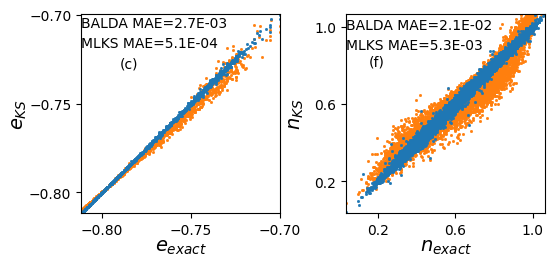

In [6]:
def fig3_c_f(n_exact,n_ml_ks,e_exact,e_ml_ks,n_balda_ks, e_balda_ks, figsize):
    ps = 2.5
    fs = 10
    fs2 = 14
    bins = 20
    er = e_exact-e_ml_ks
    nr =n_ml_ks-n_exact
    ebr = e_balda_ks - e_exact
    ebr_mae = '%.1E' % Decimal(str(np.mean(np.abs(ebr))))
    nbr = n_balda_ks - n_exact
    nbr_mae = '%.1E' % Decimal(str(np.mean(np.abs(nbr))))
    er_mae = '%.1E' % Decimal(str(np.mean(np.abs(er))))
    nr_mae = '%.1E' % Decimal(str(np.mean(np.abs(nr))))
    f, ((a4,a5)) = plt.subplots(1,2, gridspec_kw ={'height_ratios': [1], 'width_ratios':[1,1]}, sharex = False, sharey =False, figsize = (4.5*figsize, 2.1*figsize))
    f.subplots_adjust(left=0.13, bottom=0.143, right=0.99, top=0.99, hspace=0.01, wspace=0.33)
    a4.set_aspect('equal', adjustable='box');a5.set_aspect('equal', adjustable='box')
    a4.plot(e_exact, e_balda_ks, 's', c = 'C1', markersize = 1)
    a4.plot(e_exact, e_ml_ks,'s',c='C0', markersize = 1)
    a4.text(np.min(e_exact),-0.707, 'BALDA MAE='+ebr_mae, fontsize = fs) 
    a4.text(np.min(e_exact),-0.718, 'MLKS MAE='+er_mae, fontsize = fs) 
    a4.text(-0.79,-0.73,'(c)', fontsize=fs)
    #a4.grid()
    a4.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, top = False, labeltop = False, labelbottom = True)
    a4.set_ylabel(r'$e_{KS}$', fontsize = fs2, labelpad=0)
    a4.set_xlabel(r'$e_{exact}$', fontsize = fs2, labelpad=0)
    a4.set_xticks(np.array([-0.8, -0.75,-0.7]))
    a4.set_yticks(np.array([-0.8, -0.75,-0.7]))
    a4.set_xlim(np.min(e_exact), np.max(e_exact))
    a4.set_ylim(np.min(e_exact), np.max(e_exact))
    #a4.set_yticks(np.array([-0.8, -0.75,-0.7]), fontsize=fs)
    a5.plot(n_exact, n_balda_ks,'s',c='C1', markersize = 1)
    a5.plot(n_exact, n_ml_ks,'s',c='C0', markersize = 1)
    a5.text(np.min(n_exact),2*0.493, 'BALDA MAE='+nbr_mae, fontsize = fs) 
    a5.text(np.min(n_exact),2*0.493 - 0.1, 'MLKS MAE='+nr_mae, fontsize = fs)
    a5.text(0.15,0.8, '(f)', fontsize = fs)
    #a5.grid()
    a5.set_yticks(np.array([0.2,0.6,1.0]))
    a5.set_xticks(np.array([0.2,0.6,1.0]))
    a5.set_ylim(np.min(n_exact), np.max(n_exact))
    a5.set_xlim(np.min(n_exact), np.max(n_exact))
    #a5.yaxis.set_label_position("right")
    a5.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, top = False, labeltop = False, labelbottom = True)
    a5.set_ylabel(r'$n_{KS}$', fontsize = fs2, labelpad=6)
    a5.set_xlabel(r'$n_{exact}$', fontsize = fs2, labelpad=0)
    plt.show()

fig3_c_f(np.concatenate(all_data['exact_L60']['n_up']+all_data['exact_L60']['n_dn']), 2*np.concatenate(all_data['ks_L60_a4']['n']), 
all_data['exact_L60']['e_mb']/60, all_data['ks_L60_a4']['e_ks']/60,np.concatenate(balda_data['n_balda_ks']), balda_data['e_balda_ks']/60, 1.2)

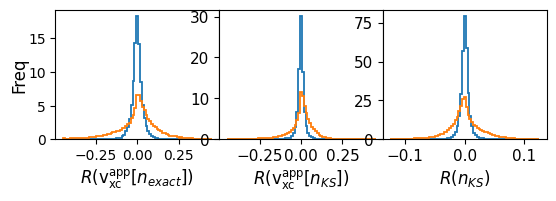

In [7]:
def fig3_g_h_i(v_hxc_exact,v_hxc_balda,v_hxc_balda_ks,n_exact,n_balda_ks,v_hxc_ml,v_hxc_ml_ks,n_ml_ks, figsize):
    ps = 2.5;fs = 10;fs2 = 12;vc = 0.45;nc = 0.125;bins = 81;lw=1.3
    vbins = np.linspace(-vc,vc,bins+1)
    nbins = np.linspace(-nc,nc,bins+1)
    nksr = n_ml_ks - n_exact
    #nksr = nksr[np.where((nksr < nc) & (nksr>-nc))[0]]
    vmlr = v_hxc_ml - v_hxc_exact
    #vmlr = vmlr[np.where((vmlr < vc) & (vmlr>-vc))[0]]
    vksr = v_hxc_ml_ks - v_hxc_exact
    #vksr = vksr[np.where((vksr < vc) & (vksr>-vc))[0]]
    nbr = n_balda_ks - n_exact
    #nbr = nbr[np.where((nbr < nc) & (nbr>-nc))[0]]
    vxcbr = v_hxc_balda - v_hxc_exact
    #vxcbr = vxcbr[np.where((vxcbr < vc) & (vxcbr>-vc))[0]]
    vxcb_ksr = v_hxc_balda_ks - v_hxc_exact
    #vxcb_ksr = vxcb_ksr[np.where((vxcb_ksr < vc) & (vxcb_ksr>-vc))[0]]
    f, ((a4,a5,a6)) = plt.subplots(1,3, gridspec_kw ={'height_ratios': [1], 'width_ratios':[1,1,1]}, sharex = False, sharey =False, figsize = (4.5*figsize, 1.5*figsize))
    f.subplots_adjust(left=0.08, bottom=0.27, right=0.99, top=0.99, hspace=0.2, wspace=0.0)
    #a4.set_aspect('equal', adjustable='box');a5.set_aspect('equal', adjustable='box')
    #a4.text(-0.3,14.5,'(g)', fontsize=fs)
    #a4.text(-0.3,7.5,'(g)', fontsize=fs)
    a4.hist(vmlr,bins=vbins,color='C0',histtype='step',density=True,linewidth=lw)
    a4.hist(vxcbr,bins=vbins,color='C1', histtype='step',density=True,linewidth=lw)
    a4.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, top = False, labeltop = False, labelbottom = True)
    a4.set_ylabel(r'Freq', fontsize = fs2, labelpad=0)
    a4.set_xlabel(r'$R(\mathrm{v_{xc}^{app}}[n_{exact}])$', fontsize = fs2, labelpad=3)
    #a4.set_xlim(-vc, vc)
    #a4.set_xticks(np.array([-0.3,0,0.3]))
    a5.hist(vksr, bins=vbins, color='C0',histtype='step',density=True,linewidth = lw)
    a5.hist(vxcb_ksr,bins=vbins,color='C1', histtype='step',density=True,linewidth=lw)
    #a5.set_xlim(-vc, vc)
    #a5.set_xticks(np.array([-0.3,0,0.3]))
    #a5.set_yticks(np.array([10,20,30]))
    #a5.text(-0.3,24,'(h)', fontsize=fs)
    #a5.yaxis.set_label_position("right")
    #a5.tick_params(axis = 'both', labelsize = fs, right = False, labelright = False, left = True, labelleft = True, bottom = True, top = False, labeltop = False, labelbottom = True)
    a5.set_xlabel(r'$R(\mathrm{v_{xc}^{app}}[n_{KS}])$', fontsize = fs2, labelpad=3)
    a6.hist(nksr,bins=nbins,color='C0',histtype='step',density=True,linewidth=lw)
    a6.hist(nbr,bins=nbins, color = 'C1',histtype = 'step',density=True,linewidth=lw)
    a6.set_xlabel(r'$R(n_{KS})$',fontsize = fs2,labelpad=3)
    #a6.set_xlim(-nc,nc)
    #a6.set_yticks(np.array([25,50,75]))
    #a6.text(-0.08,64,'(i)', fontsize=fs)
    plt.show()

fig3_g_h_i(np.concatenate(all_data['exact_L60']['v_hxc']), np.concatenate(balda_data['v_hxc_balda']), 
            np.concatenate(balda_data['v_hxc_balda_ks']), np.concatenate(all_data['exact_L60']['n_up']+all_data['exact_L60']['n_dn']),
            np.concatenate(balda_data['n_balda_ks']), np.concatenate(all_data['ml_L60_a4']['v_hxc']),
            np.concatenate(all_data['ks_L60_a4']['v_hxc']), 2*np.concatenate(all_data['ks_L60_a4']['n']), 1.2)

# Figure 4

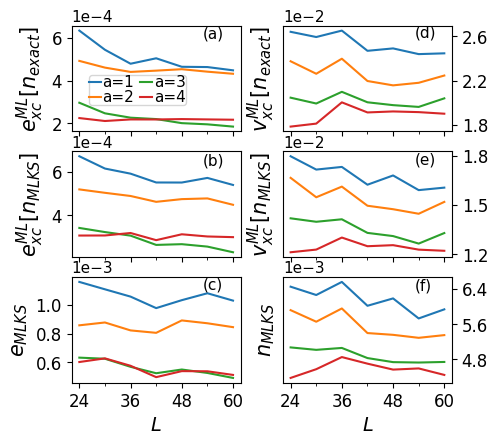

In [8]:
def fig4(sizes, excmae, excksmae, mae_c, vxcksmae_c, dmae_c, emae, figsize):
    fs = 12;fs2= 15;fs3 = 11
    f, ((a0,a1),(a2,a3),(a4,a5)) = plt.subplots(3,2, gridspec_kw ={'height_ratios': [11,11,11], 'width_ratios':[16,16]}, sharex = 'col', sharey =False, figsize = (16*2.3*figsize, 11*3*figsize))
    f.subplots_adjust(left=0.13, bottom=0.118, right=0.925, top=0.95, hspace=0.19, wspace=0.25)
    a0.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a2.ticklabel_format(axis='y', style='sci',scilimits=(0,0));a4.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    a1.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a3.ticklabel_format(axis='y', style='sci',scilimits=(0,0));a5.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    #a0.set_title('MAE', fontsize=fs)
    #a1.set_title('MAE', fontsize=fs)
    a0.set_ylabel(r'$e^{ML}_{xc}[n_{exact}]$', fontsize = fs2)
    a2.set_ylabel(r'$e^{ML}_{xc}[n_{MLKS}]$', fontsize = fs2)
    a4.set_ylabel(r'$e_{MLKS}$', fontsize = fs2)
    a1.set_ylabel(r'$v^{ML}_{xc}[n_{exact}]$', fontsize=fs2, labelpad=4)
    a3.set_ylabel(r'$v^{ML}_{xc}[n_{MLKS}]$', fontsize=fs2, labelpad=4)
    a5.set_ylabel(r'$n_{MLKS}$', fontsize=fs2, labelpad=4)
    a0.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a2.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a4.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=True, left = True, labelleft = True)
    a1.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = False, labelleft = False, right = True, labelright=True)
    a3.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = False, labelleft = False, right = True, labelright=True)
    a5.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=True, left = False, labelleft = False, right = True, labelright=True)
    #a0.grid(which='both');a1.grid(which='both');a2.grid(which='both');a3.grid(which='both');a4.grid(which='both');a5.grid(which='both')
    a4.xaxis.set_major_locator(MultipleLocator(12))
    a4.xaxis.set_major_formatter('{x:.0f}')
    a4.xaxis.set_minor_locator(MultipleLocator(6))
    a4.set_xticks(np.array([24,36,48,60]))
    a5.xaxis.set_major_locator(MultipleLocator(12))
    a5.xaxis.set_major_formatter('{x:.0f}')
    a5.xaxis.set_minor_locator(MultipleLocator(6))
    a5.set_xticks(np.array([24,36,48,60]))
    a4.set_xlabel(r'$L$', fontsize = 14)
    a5.set_xlabel(r'$L$', fontsize = 14)
    a0.set_yticks(np.array([2E-4,4E-4,6E-4]))
    a2.set_yticks(np.array([2E-4,4E-4,6E-4]))
    a4.set_yticks(np.array([6E-4,8E-4,10E-4]))
    a3.set_yticks(np.array([1.2E-2, 1.5E-2, 1.8E-2]))
    a1.set_yticks(np.array([1.8E-2, 2.2E-2, 2.6E-2]))
    a5.set_yticks(np.array([4.8E-3,5.6E-3,6.4E-3]))
    a0.text(53,6E-4,'(a)', fontsize=fs3)
    a1.text(53,2.59E-2,'(d)', fontsize=fs3)
    a2.text(53,6.3E-4,'(b)', fontsize=fs3)
    a3.text(53,1.75E-2,'(e)', fontsize=fs3)
    a4.text(53,1.108E-3,'(c)', fontsize=fs3)
    a5.text(53,6.38E-3,'(f)', fontsize=fs3)
    for i in [0,1,2,3]:
        a0.plot(sizes, excmae[i], label= 'a='+str(non_locality[i]))
        a1.plot(sizes,mae_c[i],'-', label= 'a='+str(non_locality[i]))
        a2.plot(sizes,excksmae[i], '-')
        a3.plot(sizes,vxcksmae_c[i], '-')
        a4.plot(sizes,emae[i], '-')
        a5.plot(sizes,dmae_c[i], '-')
    a0.legend(loc = (0.1,0.25),fontsize = fs3, borderpad = 0.0,labelspacing=0.0, handlelength=0.8, ncol=2, columnspacing =0.4, handletextpad=0.1)
    #plt.savefig('scaling_xc.png',dpi=600)
    plt.show()
fig4(test_sizes, ehxcmae, ehxcksmae, vhxcmae_c, vhxcksmae_c, dmae_c, emae, 0.13)

In [9]:
# Figure 5

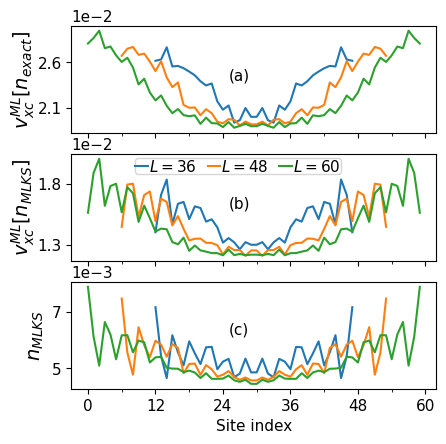

In [10]:
vhxcmae_s = (vhxcmae + np.flip(vhxcmae, axis = 1))/2
dmae_s = (dmae + np.flip(dmae, axis = 1))/2
vhxcksmae_s = (vhxcksmae + np.flip(vhxcksmae, axis = 1))/2
def fig5(vmaes,_,xcmaes,figsize):
    fs=11
    fs2 = 14
    f, ((a1),(a3),(a5)) = plt.subplots(3,1, gridspec_kw ={'height_ratios': [9,9,9], 'width_ratios':[27]}, sharex = 'col', sharey =False, figsize = (27*figsize, 3*9*figsize))
    f.subplots_adjust(left=0.14, bottom=0.11, right=0.985, top=0.95, hspace=0.2, wspace=0.04)
    sites = np.array([i+1 for i in range(48)])
    #a1.set_title('MAE versus site index', fontsize = fs)
    a1.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a3.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    a5.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    sites = np.array([i for i in range(60)])
    sizes3 = np.array([36,48,60])
    for i in range(3):
        size = sizes3[i]
        offset = (60-size)//2
        a1.plot(sites[offset:offset+size], vmaes[i,offset:offset+size], '-', label = r'$L$='+str(size))
        a3.plot(sites[offset:offset+size], xcmaes[i,offset:offset+size], '-', label = r'$L=$'+str(size))
        a5.plot(sites[offset:offset+size], _[i,offset:offset+size], '-', label = r'$L=$'+str(size))
    a3.legend(loc = (0.135*1.3,0.81),fontsize = fs, borderpad = 0.0,labelspacing=0.0, handlelength=0.8, ncol=3, columnspacing =0.7,handletextpad=0.1)
    #a1.tick_params(axis = 'both', labelsize = fs, right = True, labelright = True, left = False, labelleft = False, bottom = True, labelbottom = False, top = False, labeltop = False)
    #a1.grid(which='both');a3.grid(which='both');a5.grid(which='both')
    a5.set_xlabel('Site index', fontsize = fs)
    a5.set_ylabel(r'$n_{MLKS}$', fontsize = fs2)
  #a3.legend(fontsize = 10, borderpad = 0.1,labelspacing=0.1, handlelength=1, ncol=3, columnspacing =1, loc = 8)
    a5.set_xlabel('Site index', fontsize = fs)
    a1.text(25,2.4E-2,'(a)', fontsize=fs)
    a3.text(25,1.6E-2, '(b)', fontsize=fs)
    a5.text(25,6.2E-3, '(c)', fontsize = fs)
    a1.set_yticks(np.array([2.1E-2,2.6E-2]))
    a3.set_yticks(np.array([1.3E-2,1.8E-2]))
    a5.set_yticks(np.array([5E-3,7E-3]))
    a1.set_ylabel(r'$v_{xc}^{ML} [n_{exact}]$', fontsize = fs2, labelpad=0)
    a3.set_ylabel(r'$v_{xc}^{ML} [n_{MLKS}]$', fontsize = fs2, labelpad=0)
    a5.xaxis.set_major_locator(MultipleLocator(12))
    a5.xaxis.set_major_formatter('{x:.0f}')
    a5.xaxis.set_minor_locator(MultipleLocator(6))
    #plt.savefig('boundaries4_a4sym_xc.png', dpi = 600)
    plt.show()

fig5(vhxcmae_s,dmae_s,vhxcksmae_s,0.16)

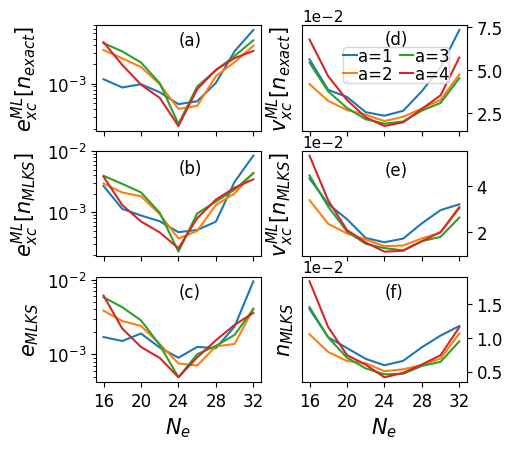

In [11]:
with open('data_json/fig6_data.json') as f:
    data = json.load(f)

data['occupancy'] = np.array(data['occupancy'])
data['e_hxc_mae'] = np.array(data['e_hxc_mae'])
data['e_hxc_ks_mae'] = np.array(data['e_hxc_ks_mae'])
data['v_hxc_mae'] = np.array(data['v_hxc_mae'])
data['v_hxc_ks_mae'] = np.array(data['v_hxc_ks_mae'])
data['n_ks_mae'] = np.array(data['n_ks_mae'])
data['e_ks_mae'] = np.array(data['e_ks_mae'])

alist=np.array([1,2,3,4])

def fig6(occupancy, e_hxc_mae, e_hxc_ks_mae, v_hxc_mae, v_hxc_ks_mae, n_ks_mae, e_ks_mae, figsize):
    fs = 11
    fs2= 15
    fs = 12;fs2= 15;fs3 = 11
    f, ((a0,a1),(a2,a3),(a4,a5)) = plt.subplots(3,2, gridspec_kw ={'height_ratios': [11,11,11], 'width_ratios':[16,16]}, sharex = 'col', sharey =False, figsize = (16*2.3*figsize, 11*3*figsize))
    f.subplots_adjust(left=0.15, bottom=0.118, right=0.925, top=0.95, hspace=0.19, wspace=0.25)
    a0.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a2.ticklabel_format(axis='y', style='sci',scilimits=(0,0));a4.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    a1.ticklabel_format(axis='y', style='scientific',scilimits=(0,0));a3.ticklabel_format(axis='y', style='sci',scilimits=(0,0));a5.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
    a0.set_ylabel(r'$e^{ML}_{xc}[n_{exact}]$', fontsize = fs2)
    a2.set_ylabel(r'$e^{ML}_{xc}[n_{MLKS}]$', fontsize = fs2)
    a4.set_ylabel(r'$e_{MLKS}$', fontsize = fs2)
    a1.set_ylabel(r'$v^{ML}_{xc}[n_{exact}]$', fontsize=fs2, labelpad=4)
    a3.set_ylabel(r'$v^{ML}_{xc}[n_{MLKS}]$', fontsize=fs2, labelpad=4)
    a5.set_ylabel(r'$n_{MLKS}$', fontsize=fs2, labelpad=4)
    a0.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a2.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = True, labelleft = True)
    a4.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=True, left = True, labelleft = True)
    a1.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = False, labelleft = False, right = True, labelright=True)
    a3.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=False, left = False, labelleft = False, right = True, labelright=True)
    a5.tick_params(axis = 'both', labelsize = fs, top = False, labeltop=False, bottom = True, labelbottom=True, left = False, labelleft = False, right = True, labelright=True)
    a4.set_xticks(np.array([16,20,24,28,32]))
    a5.set_xticks(np.array([16,20,24,28,32]))
    a4.set_xlabel(r'$N_e$', fontsize = fs2)
    a5.set_xlabel(r'$N_e$', fontsize = fs2)
    '''a0.set_yticks(np.array([2E-4,4E-4,6E-4]))
    a2.set_yticks(np.array([2E-4,4E-4,6E-4]))
    a4.set_yticks(np.array([6E-4,8E-4,10E-4]))
    a3.set_yticks(np.array([1.2E-2, 1.5E-2, 1.8E-2]))
    a1.set_yticks(np.array([1.8E-2, 2.2E-2, 2.6E-2]))
    a5.set_yticks(np.array([4.8E-3,5.6E-3,6.4E-3]))'''
    a0.text(24,4E-3,'(a)', fontsize=fs)
    a1.text(24,6.5E-2,'(d)', fontsize=fs)
    a2.text(24,4.4E-3,'(b)', fontsize=fs)
    a3.text(24,4.5E-2,'(e)', fontsize=fs)
    a4.text(24,5.8E-3,'(c)', fontsize=fs)
    a5.text(24,1.6E-2,'(f)', fontsize=fs)
    a0.set_yscale('log')
    a2.set_yscale('log')
    a4.set_yscale('log')
    
    for i in [0,1,2,3]:
        a0.plot(occupancy, e_hxc_mae[i], label= 'a='+str(alist[i]))
        a1.plot(occupancy,v_hxc_mae[i],'-', label= 'a='+str(alist[i]))
        a2.plot(occupancy,e_hxc_ks_mae[i], '-')
        a3.plot(occupancy,v_hxc_ks_mae[i], '-')
        a4.plot(occupancy,e_ks_mae[i], '-')
        a5.plot(occupancy,n_ks_mae[i], '-')
    a1.legend(loc = (0.25,0.45),fontsize = fs, borderpad = 0.0,labelspacing=0.0, handlelength=0.8, ncol=2, columnspacing =0.4, handletextpad=0.1)
    #plt.savefig('n_dependence.png', dpi = 600)
    plt.show()
    
start=7;stop=16
fig6(data['occupancy'][start:stop],data['e_hxc_mae'][:,start:stop],data['e_hxc_ks_mae'][:,start:stop],data['v_hxc_mae'][:,start:stop],data['v_hxc_ks_mae'][:,start:stop],data['n_ks_mae'][:,start:stop],data['e_ks_mae'][:,start:stop], 0.13)


# Figure 7

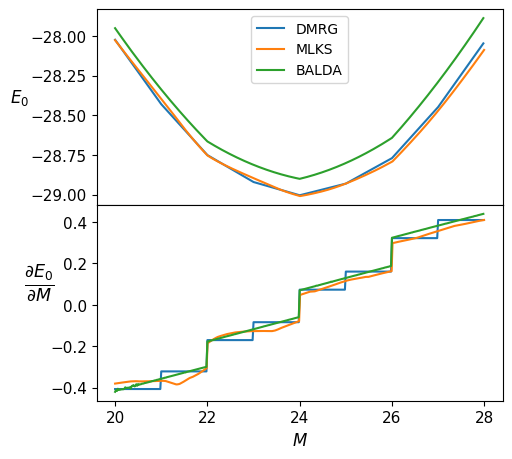

In [12]:
with open('data_json/piecewise_linearity_data_L36_N20_30.json', 'r') as f2:
    data = json.load(f2)

e_mlks = np.array(data['e_mlks'])
e_ho_mlks = np.array(data['e_ho_mlks'])
e_balda = np.array(data['e_balda'])[:500]
e_ho_balda = np.array(data['e_ho_balda'])[:500]
e_dmrg = np.array(data['e_dmrg'])
t0_mlks = np.array(data['t0_mlks'])
t0_balda = np.array(data['t0_balda'])
    
nlist_dmrg = np.array([20 + i for i in range(11)])
interp = scipy.interpolate.interp1d(nlist_dmrg, e_dmrg, kind = 'linear')
nlist_balda = np.linspace(20,29.98,500)
e_dmrg_2 = interp(nlist_balda)
dedn_dmrg = (e_dmrg_2[1:] - e_dmrg_2[:-1])/0.02

num=100
L=36
U=4
V=np.zeros(L)

dt0dn_balda = (t0_balda[1:] - t0_balda[:-1])/0.02
dt0dn_mlks = (t0_mlks[1:] - t0_mlks[:-1])/0.02
dedn_balda = (e_balda[1:] - e_balda[:-1])/0.02
dedn_mlks = (e_mlks[1:] - e_mlks[:-1])/0.02
nlist = np.linspace(10,15,500)
N2list = np.array([0.01*i for i in range(100)])

ehl_mlks = np.array([dedn_mlks[99 +100*i] for i in range(4)])
ehr_mlks = np.array([dedn_mlks[100*i] for i in range(5)])
ehl_balda = np.array([dedn_balda[99 +100*i] for i in range(4)])
ehr_balda = np.array([dedn_balda[100*i] for i in range(5)])

t0l_mlks = np.array([dt0dn_mlks[99 +100*i] for i in range(4)])
t0r_mlks = np.array([dt0dn_mlks[100*i] for i in range(5)])
t0l_balda = np.array([dt0dn_balda[99 +100*i] for i in range(4)])
t0r_balda = np.array([dt0dn_balda[100*i] for i in range(5)])

dd_t0_mlks = t0r_mlks[1:] - t0l_mlks
dd_t0_balda = t0r_balda[1:] - t0l_balda

dd_mlks = ehr_mlks[1:] - ehl_mlks
dd_balda = ehr_balda[1:] - ehl_balda

ehl_dmrg = np.array([dedn_dmrg[49 + 50*i] for i in range(8)])
ehr_dmrg = np.array([dedn_dmrg[50*i] for i in range(1,9)])

dd_dmrg = ehr_dmrg - ehl_dmrg
dd2_dmrg = np.array([dd_dmrg[2*i+1] for i in range(4)])

delta_balda = 100*(dd2_dmrg - dd_balda)/dd2_dmrg
delta_t0_balda = 100*(dd2_dmrg - dd_t0_balda)/dd2_dmrg

delta_mlks = 100*(dd2_dmrg - dd_mlks)/dd2_dmrg
delta_t0_mlks = 100*(dd2_dmrg - dd_t0_mlks)/dd2_dmrg

nn = np.array([22,24,26,28])

table = np.round(np.concatenate([nn[:,None], dd2_dmrg[:,None], dd_mlks[:,None], delta_mlks[:,None], dd_t0_mlks[:,None],
                                 delta_t0_mlks[:,None], dd_balda[:,None], delta_balda[:,None], dd_t0_balda[:,None], delta_t0_balda[:,None]],axis=1),3)
fs2 = 12
figsize = 1.5
    
f, ((a0),(a2)) = plt.subplots(2,1, gridspec_kw ={'height_ratios': [1,1], 'width_ratios':[1]}, sharex = 'col', sharey =False, figsize = (3.3*figsize, 3*figsize))
f.subplots_adjust(left=0.15, bottom=0.11, right=0.97, top=0.98, hspace=0.0, wspace=0.32)

a0.set_ylabel(r'$E_0$', fontsize = fs2, rotation=0,labelpad=8)
a2.set_ylabel(r'$\frac{\partial E_0}{\partial M}$', fontsize = 18, rotation = 0, labelpad=8)
a2.set_xlabel(r'$M$', fontsize = fs2)
a0.plot(nlist_balda[:400], e_dmrg_2[:400], label = 'DMRG')
a0.plot(2*nlist[:400], e_mlks[:400], label = 'MLKS')
a0.plot(nlist_balda[:400], e_balda[:400], label = 'BALDA')
a0.legend()
a2.plot(nlist_balda[:400], dedn_dmrg[:400],  label = 'DMRG')
a2.plot(2*nlist[:400], dedn_mlks[:400], label = 'MLKS')
a2.plot(nlist_balda[:400], dedn_balda[:400], label='BALDA')
plt.show()

# Table 1

In [13]:
print(table)

[[22.     0.151  0.121 20.277  0.127 16.05   0.122 19.083  0.127 15.785]
 [24.     0.157  0.127 19.449  0.135 13.742  0.13  17.374  0.138 11.987]
 [26.     0.162  0.135 16.321  0.144 10.832  0.136 15.542  0.142 11.99 ]
 [28.     0.164  0.141 13.899  0.148 10.067  0.142 13.702  0.149  9.08 ]]


In [14]:
with open('data_json/polarizability_data.json', 'rb') as f:
    data = json.load(f)

with open('data_json/fig10_balda.json', mode = 'r') as f:
    balda_data = json.load(f)

U=4
L=48

n_dmrg = np.array(data['n_dmrg'])
n_dmrg_prime = np.array(data['n_dmrg_prime'])
alpha_dmrg = np.array(data['alpha_dmrg'])
vhxc_dmrg = np.array(data['vhxc_dmrg'])
vhxc_dmrg_prime = np.array(data['vhxc_dmrg_prime'])
n_mlks = np.array(data['n_mlks'])
vhxc_mlks = np.array(data['vhxc_mlks'])
n_mlks_prime = np.array(data['n_mlks_prime'])
vhxc_mlks_prime = np.array(data['vhxc_mlks_prime'])
alpha_mlks = np.array(data['alpha_mlks'])

h_dmrg = U*n_dmrg; h_dmrg = h_dmrg - np.mean(h_dmrg, axis = 1)[:,None]
h_dmrg_prime = U*n_dmrg_prime; h_dmrg_prime = h_dmrg_prime - np.mean(h_dmrg_prime, axis = 1)[:,None]
vxc_dmrg = vhxc_dmrg - h_dmrg
vxc_dmrg_prime = vhxc_dmrg_prime - h_dmrg_prime

h_mlks = U*n_mlks; h_mlks = h_mlks - np.mean(h_mlks,axis = 2)[:,:,None]
h_mlks_prime = U*n_mlks_prime; h_mlks_prime = h_mlks_prime - np.mean(h_mlks_prime ,axis = 2)[:,:,None]
vxc_mlks = vhxc_mlks - h_mlks
vxc_mlks_prime = vhxc_mlks_prime - h_mlks_prime

v_xc_balda_prime = np.array(balda_data['v_xc_balda_prime'])
v_xc_balda = np.array(balda_data['v_xc_balda'])
v_h_balda = np.array(balda_data['v_h_balda'])
v_h_balda_prime = np.array(balda_data['v_h_balda_prime'])

sizes = np.array([18+3*i for i in range(19)])
fit1 = np.polyfit(np.log(sizes), np.log(alpha_dmrg), deg = 1)
alpha1_e = np.exp(fit1[1])

fits = np.array([np.polyfit(np.log(sizes), np.log(alpha_mlks[i]), deg = 1) for i in range(4)])
sizesc = np.linspace(18,72,1000)

def efield(eps, L):
    x=(L+1)/2
    return -1*eps*np.array([i-x for i in range(1,L+1)])
eps = 0.01
xx=(L+1)/2
r=np.array([i-xx for i in range(1,L+1)])

# Figure 8

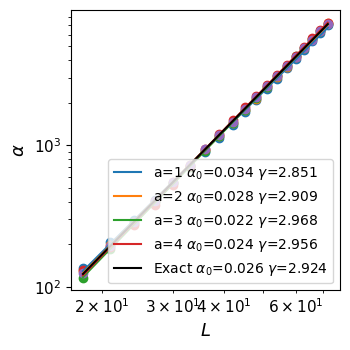

In [15]:
figsize=0.9*np.array([4,4])
plt.figure(figsize=figsize)
plt.yscale('log')
plt.xscale('log')
for a,_ in enumerate(alpha_mlks):
    plt.scatter(sizes, alpha_mlks[a])
    plt.plot(sizesc, np.exp(fits[a,1])*sizesc**fits[a,0], label = 'a='+str(a+1)+r' $\alpha_0$='+str(np.round(np.exp(fits[a,1]), 3))+r' $\gamma$='+str(np.round(fits[a,0],3)))
plt.scatter(sizes,alpha_dmrg)
plt.plot(sizesc, alpha1_e*sizesc**fit1[0],c='k',label=r'Exact $\alpha_0$='+str(np.round(alpha1_e, 3))+r' $\gamma$='+str(np.round(fit1[0],3)))
plt.legend()
plt.xlabel(r'$L$', fontsize = 13)
plt.ylabel(r'$\alpha$', fontsize = 13)
plt.tight_layout()
plt.show()

# Figure 9

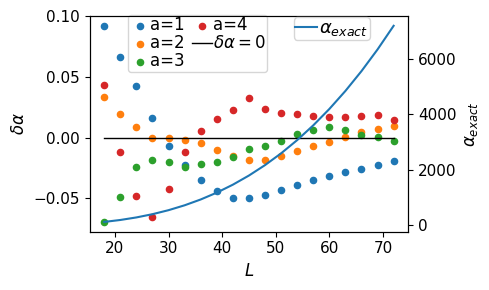

In [16]:
fs=12
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()  
for a, _ in enumerate(alpha_mlks):
    ax1.scatter(sizes,(alpha_mlks[a] - alpha_dmrg)/alpha_dmrg, s =20, label = 'a='+str(a+1))
ax1.plot(np.linspace(18,72,1000), np.zeros(1000), 'k-', linewidth=1, label = r'$\delta \alpha=0$')
ax2.plot(sizes, alpha_dmrg, label = r'$\alpha_{exact}$')
ax1.set_ylabel(r'$\delta \alpha$', fontsize = 12)
ax2.set_ylabel(r'$\alpha_{exact}$', fontsize = 12)
ax1.set_xlabel(r'$L$', fontsize = 12)
ax1.legend(fontsize = fs,loc = (0.12,0.74),ncol=2,columnspacing = 0.4, borderpad = 0.1, handlelength = 1.2, labelspacing = 0.0, handletextpad = 0.05)
ax2.legend(fontsize=13,loc = (0.64, 0.89), borderpad = 0.1, handlelength = 1.2, handletextpad = 0.1, labelspacing = 0.0)
plt.tight_layout()
plt.show()

# Figure 10

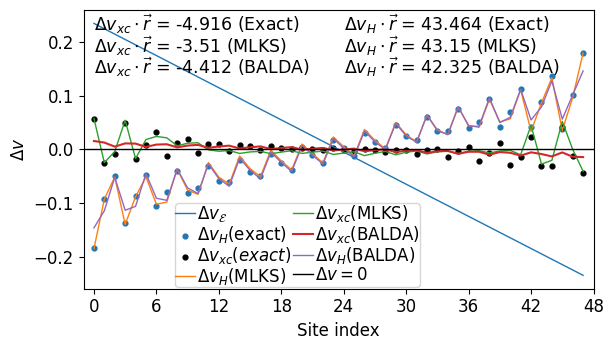

In [17]:
fs=12.0
L=48
j = (72 - L)//3
plt.figure(figsize=(0.6*10.4, 0.6*6))
plt.ylabel(r'$\Delta v$', fontsize = fs)
plt.xlim(-1,48)
plt.ylim(-0.26,0.26)
plt.plot([i for i in range(L)],efield(eps,L), label=r'$\Delta v_{\mathcal{E}}$', linewidth=1)
plt.scatter([i for i in range(L)], (h_dmrg_prime-h_dmrg)[-1-j,:L],label = r'$\Delta v_H$(exact)', s = 12)
plt.scatter([i for i in range(L)],(vxc_dmrg_prime-vxc_dmrg)[-1-j,:L], marker = 'o', c = 'k', label=r'$\Delta v_{xc}(exact)$', s=12)
plt.plot((h_mlks_prime - h_mlks)[2,-1-j,:L], label = '$\Delta v_{H}$(MLKS)', linewidth=1)
plt.plot((vxc_mlks_prime - vxc_mlks)[2,-1-j,:L], label = '$\Delta v_{xc}$(MLKS)', linewidth=1)
plt.plot(v_xc_balda_prime - v_xc_balda,label = '$\Delta v_{xc}$(BALDA)')
plt.plot((v_h_balda_prime - v_h_balda), label = '$\Delta v_{H}$(BALDA)', linewidth=1)
plt.plot(np.array([6*(i-1) for i in range(L//6 +2)]), np.array([0.0 for i in range(L//6+2)]), 'k-', linewidth=1, label = r'$\Delta v = 0$')
#plt.text(0,0.19, r'$\Delta v_{\mathcal{E}}\cdot \vec{r}$ = '+str(np.round(np.dot(efield(eps,L), r),3)),fontsize=12.5)
plt.text(0,0.22, r'$\Delta v_{xc}\cdot \vec{r}$ = '+str(np.round(np.dot((vxc_dmrg_prime-vxc_dmrg)[-1-j,:L], r),3))+' (Exact)',fontsize=12.5)
plt.text(0,0.18, r'$\Delta v_{xc}\cdot \vec{r}$ = '+str(np.round(np.dot((vxc_mlks_prime - vxc_mlks)[2,-1-j,:L], r),3))+' (MLKS)',fontsize=12.5)
plt.text(0,0.14, r'$\Delta v_{xc}\cdot \vec{r}$ = '+str(np.round(np.dot((v_xc_balda_prime - v_xc_balda), r),3))+' (BALDA)',fontsize=12.5)
plt.text(24,0.22, r'$\Delta v_{H}\cdot \vec{r}$ = '+str(np.round(np.dot((h_dmrg_prime-h_dmrg)[-1-j,:L], r),3))+' (Exact)',fontsize=12.5)
plt.text(24,0.18, r'$\Delta v_{H}\cdot \vec{r}$ = '+str(np.round(np.dot((h_mlks_prime - h_mlks)[2,-1-j,:L], r),3))+' (MLKS)',fontsize=12.5)
plt.text(24,0.14, r'$\Delta v_{H}\cdot \vec{r}$ = '+str(np.round(np.dot((v_h_balda_prime-v_h_balda), r),3))+' (BALDA)',fontsize=12.5)
plt.xlabel('Site index', fontsize = fs)
plt.xticks([6*i for i in range(L//6 +1)], fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs,loc = (0.18, 0.005), borderpad = 0.0,ncol=2, columnspacing=0.1, handlelength = 1.2, handletextpad = 0.1, labelspacing = 0.0)
plt.tight_layout()
plt.show()

# Figure 11

In [18]:
with open('data_json/fig11_data.json', mode='r') as f:
    data = json.load(f)
def vabs(v):
    L = v.shape[-1]
    return (1/L)*np.sum(np.abs(v), axis=1)
    
eps=1E-2

v_L21 = np.array(data['v_L21'])
n_L21_dmrg = np.array(data['n_L21_dmrg'])
n_prime_L21_dmrg = np.array(data['n_prime_L21_dmrg'])
n_L21_balda = np.array(data['n_L21_balda'])
n_prime_L21_balda = np.array(data['n_prime_L21_balda'])
n_L21_mlks = np.array(data['n_L21_mlks'])
n_prime_L21_mlks = np.array(data['n_prime_L21_mlks'])
v_L42 = np.array(data['v_L42'])
n_L42_dmrg = np.array(data['n_L42_dmrg'])
n_prime_L42_dmrg = np.array(data['n_prime_L42_dmrg'])
n_L42_balda = np.array(data['n_L42_balda'])
n_prime_L42_balda = np.array(data['n_prime_L42_balda'])
n_L42_mlks = np.array(data['n_L42_mlks'])
n_prime_L42_mlks = np.array(data['n_prime_L42_mlks'])

vnorm_L21 = vabs(np.array(data['v_L21']))
vnorm_L42 = vabs(np.array(data['v_L42']))

L=21
x = (L+1)/2
r = np.array([i- x for i in range(1,L+1)])
alpha_L21_dmrg = (np.dot(n_prime_L21_dmrg-n_L21_dmrg, r[:,None])/eps)[:,0]
alpha_L21_balda = (np.dot(n_prime_L21_balda-n_L21_balda, r[:,None])/eps)[:,0]
alpha_L21_mlks = (np.dot(n_prime_L21_mlks-n_L21_mlks, r[:,None])/eps)[:,0]
L=42
x = (L+1)/2
r = np.array([i- x for i in range(1,L+1)])
alpha_L42_dmrg = (np.dot(n_prime_L42_dmrg-n_L42_dmrg, r[:,None])/eps)[:,0]
alpha_L42_balda = (np.dot(n_prime_L42_balda-n_L42_balda, r[:,None])/eps)[:,0]
alpha_L42_mlks = (np.dot(n_prime_L42_mlks-n_L42_mlks, r[:,None])/eps)[:,0]

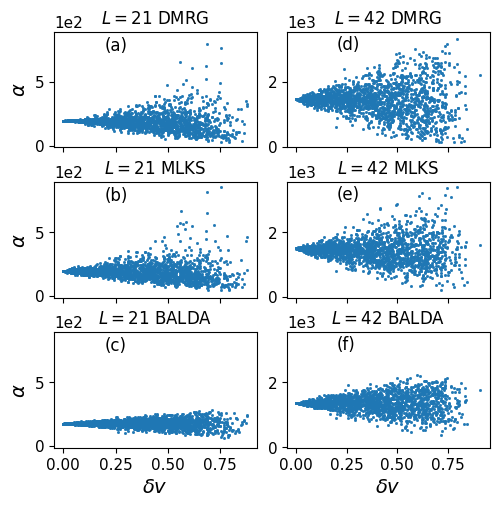

In [19]:
ps = 2.5
fs = 12
fs2 = 14
bins = 20
figsize=1.1
ms = 3
cs = 7
f, ((a0,a1),(a2,a3),(a4,a5)) = plt.subplots(3,2, gridspec_kw ={'height_ratios': [1,1,1], 'width_ratios':[1.5,1.5]}, sharex = 'col', sharey ='col', figsize = (4.5*figsize, 4.5*figsize))
f.subplots_adjust(left=0.11, bottom=0.11, right=0.99, top=0.95, hspace=0.3, wspace=0.15)
#a4.set_aspect('equal', adjustable='box');a5.set_aspect('equal', adjustable='box')

a0.plot(vnorm_L21,alpha_L21_dmrg,'s',markersize=1, label = 'DMRG')
a2.plot(vnorm_L21,alpha_L21_mlks,'s',markersize=1, label = 'MLKS')
a4.plot(vnorm_L21,alpha_L21_balda,'s',markersize=1, label = 'BALDA')

a1.plot(vnorm_L42,alpha_L42_dmrg,'s',markersize=1, label = 'DMRG')
a3.plot(vnorm_L42,alpha_L42_mlks,'s',markersize=1, label = 'MLKS')
a5.plot(vnorm_L42,alpha_L42_balda,'s',markersize=1, label = 'BALDA')

a0.ticklabel_format(axis='y', style='sci', scilimits=(2,2))
a1.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
a2.ticklabel_format(axis='y', style='sci', scilimits=(2,2))
a3.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
a4.ticklabel_format(axis='y', style='sci', scilimits=(2,2))
a5.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

a0.set_title(r'$L=21$ DMRG',fontsize = fs)
a1.set_title(r'$L=42$ DMRG',fontsize = fs)
a2.set_title(r'$L=21$ MLKS',fontsize = fs)
a3.set_title(r'$L=42$ MLKS',fontsize = fs)
a4.set_title(r'$L=21$ BALDA',fontsize = fs)
a5.set_title(r'$L=42$ BALDA',fontsize = fs)

a0.text(0.2, 750, '(a)', fontsize = fs)
a2.text(0.2, 750, '(b)', fontsize = fs)
a4.text(0.2, 750, '(c)', fontsize = fs)
a1.text(0.2, 3000, '(d)', fontsize = fs)
a3.text(0.2, 3000, '(e)', fontsize = fs)
a5.text(0.2, 3000, '(f)', fontsize = fs)

a4.set_xlabel(r'$\delta v$',fontsize = fs2)
a5.set_xlabel(r'$\delta v$',fontsize = fs2)

a0.set_ylabel(r'$\alpha$',fontsize = fs2)
a2.set_ylabel(r'$\alpha$',fontsize = fs2)
a4.set_ylabel(r'$\alpha$',fontsize = fs2)

a4.set_xticks(np.array([0.0,0.25,0.5,0.75]))
a5.set_xticks(np.array([0.0,0.25,0.5,0.75]))
plt.show()

# Figure 12

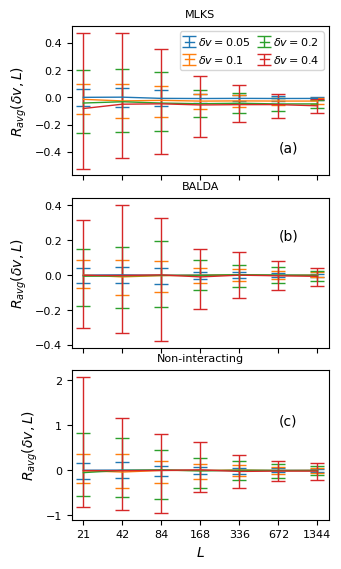

In [20]:
num=801

def percentile2(alpha, max_):
    p=97.5
    if max_==True:
        return np.percentile(alpha, p)
    else:
        return np.percentile(alpha, 100-p)

def load_mlks(x):
    with open(x, 'rb') as f:
        data = json.load(f)
    n = np.array(data[1])[:num]
    n_p = np.array(data[1])[num:]
    L = n.shape[-1]
    eps = 1/(2*L)
    x = (L+1)/2
    r = np.array([i- x for i in range(1,L+1)])
    alpha = (2*np.dot(n_p - n, r[:,None])/eps)[:,0]
    alpha0 = alpha[0]
    alpha1 = np.mean(alpha[1:201])
    alpha2 = np.mean(alpha[201:401])
    alpha3 = np.mean(alpha[401:601])
    alpha4 = np.mean(alpha[601:801])
    a1_m = percentile2(alpha[1:201], True)
    a2_m = percentile2(alpha[201:401], True)
    a3_m = percentile2(alpha[401:601], True)
    a4_m = percentile2(alpha[601:801],True)
    a1_min = percentile2(alpha[1:201],False)
    a2_min = percentile2(alpha[201:401], False)
    a3_min = percentile2(alpha[401:601],False)
    a4_min = percentile2(alpha[601:801], False)
    return np.array([alpha0,alpha1,alpha2,alpha3,alpha4]), np.array([a1_min,a2_min,a3_min,a4_min]), np.array([a1_m,a2_m,a3_m,a4_m])

def load_ni(x):
    with open(x, 'rb') as f:
        data = json.load(f)
    n = 2*np.array(data)[:num]
    n_p = 2*np.array(data)[num:]
    L = n.shape[-1]
    eps = 1/(2*L)
    x = (L+1)/2
    r = np.array([i- x for i in range(1,L+1)])
    alpha = (2*np.dot(n_p - n, r[:,None])/eps)[:,0]
    alpha0 = alpha[0]
    alpha1 = np.mean(alpha[1:201])
    alpha2 = np.mean(alpha[201:401])
    alpha3 = np.mean(alpha[401:601])
    alpha4 = np.mean(alpha[601:801])
    a1_m = percentile2(alpha[1:201], True)
    a2_m = percentile2(alpha[201:401], True)
    a3_m = percentile2(alpha[401:601], True)
    a4_m = percentile2(alpha[601:801],True)
    a1_min = percentile2(alpha[1:201],False)
    a2_min = percentile2(alpha[201:401], False)
    a3_min = percentile2(alpha[401:601],False)
    a4_min = percentile2(alpha[601:801], False)
    return np.array([alpha0,alpha1,alpha2,alpha3,alpha4]), np.array([a1_min,a2_min,a3_min,a4_min]), np.array([a1_m,a2_m,a3_m,a4_m])

def load_balda(x):
    with open(x, 'rb') as f:
        data = json.load(f)
    n = np.array(data)[:num]
    n_p = np.array(data)[num:]
    L = n.shape[-1]
    eps = 1/(2*L)
    x = (L+1)/2
    r = np.array([i- x for i in range(1,L+1)])
    alpha = (2*np.dot(n_p - n, r[:,None])/eps)[:,0]
    alpha0 = alpha[0]
    alpha1 = np.mean(alpha[1:201])
    alpha2 = np.mean(alpha[201:401])
    alpha3 = np.mean(alpha[401:601])
    alpha4 = np.mean(alpha[601:801])
    a1_m = percentile2(alpha[1:201], True)
    a2_m = percentile2(alpha[201:401], True)
    a3_m = percentile2(alpha[401:601], True)
    a4_m = percentile2(alpha[601:801],True)
    a1_min = percentile2(alpha[1:201],False)
    a2_min = percentile2(alpha[201:401], False)
    a3_min = percentile2(alpha[401:601],False)
    a4_min = percentile2(alpha[601:801], False)
    return np.array([alpha0,alpha1,alpha2,alpha3,alpha4]), np.array([a1_min,a2_min,a3_min,a4_min]), np.array([a1_m,a2_m,a3_m,a4_m])


l_list = np.array([21,42,84,168,336,672,1344])
    
alpha_array = np.zeros((len(l_list), 5))
min_array = np.zeros((len(l_list), 4))
max_array = np.zeros((len(l_list), 4))

alpha_array_ba = np.zeros((len(l_list), 5))
min_array_ba = np.zeros((len(l_list), 4))
max_array_ba = np.zeros((len(l_list), 4))

alpha_array_ni = np.zeros((len(l_list), 5))
min_array_ni = np.zeros((len(l_list), 4))
max_array_ni = np.zeros((len(l_list), 4))

for a,l in enumerate(l_list):
    data = load_mlks('data_json/fig12_data/L'+str(l)+'_num801_mlks_bin_eps2L.json')
    alpha_array[a] = data[0]
    min_array[a] = data[1]
    max_array[a] = data[2]
    data = load_balda('data_json/fig12_data/L'+str(l)+'_num801_balda_bin_eps2L.json')
    alpha_array_ba[a] = data[0]
    min_array_ba[a] = data[1]
    max_array_ba[a] = data[2]
    data = load_ni('data_json/fig12_data/L'+str(l)+'_num801_ni_bin_eps2L.json')
    alpha_array_ni[a] = data[0]
    min_array_ni[a] = data[1]
    max_array_ni[a] = data[2]
    
    
alpha2 = (alpha_array[:,1:] - alpha_array[:,0][:,None])/alpha_array[:,0][:,None]
alpha_min = alpha2 - (min_array - alpha_array[:,0][:,None])/alpha_array[:,0][:,None]
alpha_max = (max_array - alpha_array[:,0][:,None])/alpha_array[:,0][:,None] - alpha2

alpha_ba = (alpha_array_ba[:,1:] - alpha_array_ba[:,0][:,None])/alpha_array_ba[:,0][:,None]
alpha_min_ba = alpha_ba - (min_array_ba - alpha_array_ba[:,0][:,None])/alpha_array_ba[:,0][:,None]
alpha_max_ba = (max_array_ba - alpha_array_ba[:,0][:,None])/alpha_array_ba[:,0][:,None] - alpha_ba

alpha_ni = (alpha_array_ni[:,1:] - alpha_array_ni[:,0][:,None])/alpha_array_ni[:,0][:,None]
alpha_min_ni = alpha_ni - (min_array_ni - alpha_array_ni[:,0][:,None])/alpha_array_ni[:,0][:,None]
alpha_max_ni = (max_array_ni - alpha_array_ni[:,0][:,None])/alpha_array_ni[:,0][:,None] - alpha_ni

delta_list = np.array([0.05,0.1,0.2,0.4])

ps = 2.5
fs = 8
fs2 = 10
bins = 20
figsize=1.1
ms = 10
cs = 5
ct = 1
elw=1
lw = 1
f, ((a0),(a2),(a4)) = plt.subplots(3,1, gridspec_kw ={'height_ratios': [1,1,1], 'width_ratios':[1.5]}, sharex = 'col', sharey =False, figsize = (3*figsize, 5*figsize))
f.subplots_adjust(left=0.19, bottom=0.07, right=0.97, top=0.968, hspace=0.15, wspace=0.15)

for a, delta in enumerate(delta_list):
    a0.errorbar(l_list,alpha2[:,a], yerr=np.concatenate([alpha_min[:,a][None,:],alpha_max[:,a][None,:]], axis=0),linewidth = lw, capsize=cs,markersize=ms,elinewidth=elw, capthick=ct, label = r'$\delta v=$'+str(delta))
    a2.errorbar(l_list,alpha_ba[:,a], yerr=np.concatenate([alpha_min_ba[:,a][None,:],alpha_max_ba[:,a][None,:]], axis=0),linewidth = lw, capsize=cs,markersize=ms,elinewidth=elw, capthick=ct, label = r'$\delta v=$'+str(delta))
    a4.errorbar(l_list,alpha_ni[:,a], yerr=np.concatenate([alpha_min_ni[:,a][None,:],alpha_max_ni[:,a][None,:]], axis=0),linewidth = lw, capsize=cs,markersize=ms,elinewidth=elw, capthick=ct, label = r'$\delta v=$'+str(delta))

a0.set_title('MLKS', fontsize=fs)
a2.set_title('BALDA', fontsize=fs)
a4.set_title('Non-interacting', fontsize=fs)

a0.text(672, -0.4, '(a)')
a2.text(672, 0.2, '(b)')
a4.text(672, 1, '(c)')

a0.legend(fontsize=fs, loc='upper right',borderpad = 0.4,labelspacing=0.5, handlelength=0.8, ncol=2, columnspacing =0.8, handletextpad=0.4)
a4.set_xlabel(r'$L$', fontsize = fs2)
a0.set_xscale('log')
a2.set_xscale('log')
a4.set_xscale('log')
a4.set_xticks(l_list, labels=l_list,minor=False)
a4.set_xticklabels(l_list, fontsize=fs)
a0.set_ylabel(r'$R_{avg}(\delta v, L)$')
a2.set_ylabel(r'$R_{avg}(\delta v, L)$')
a4.set_ylabel(r'$R_{avg}(\delta v, L)$')
a0.tick_params(axis = 'y', which='major', labelsize = fs)
a2.tick_params(axis = 'y', which='major', labelsize = fs)
a4.tick_params(axis = 'y', which='major', labelsize = fs)
a4.tick_params(axis = 'x', which='minor', labelsize = fs, top = False, labeltop=False, bottom = False, labelbottom=False, left = True, labelleft = True)
a0.tick_params(axis = 'x', which='minor', labelsize = fs, top = False, labeltop=False, bottom = False, labelbottom=False, left = True, labelleft = True)
a2.tick_params(axis = 'x', which='minor', labelsize = fs, top = False, labeltop=False, bottom = False, labelbottom=False, left = True, labelleft = True)
plt.show()


# Figure 13